In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Normalization (Min Max Scaler)
from sklearn.preprocessing import MinMaxScaler

#split data
from sklearn.model_selection import train_test_split

# Linear Regression
from sklearn.linear_model import LinearRegression

# Ridge Regression
from sklearn.linear_model import Ridge

# Lasso Regression
from sklearn.linear_model import Lasso

# Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit

# Generalized Linear Model (GLM) / Tweedie Regressor
from sklearn.linear_model import TweedieRegressor

# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Support Vector Machines (SVM) for Regression
from sklearn.svm import SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

In [2]:
#load data 
data=pd.read_excel('data.xlsx')
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,63,95,61,59,83,62,60,64,56,90,18178
1,100,85,71,85,64,94,97,65,98,66,118804
2,81,50,80,100,67,78,62,79,54,73,51562
3,92,86,50,87,52,98,99,75,83,95,90026
4,60,55,70,77,75,77,97,89,91,52,23908
...,...,...,...,...,...,...,...,...,...,...,...
995,66,63,73,86,69,95,80,72,78,65,31198
996,96,59,98,91,99,94,63,91,59,53,92549
997,87,77,58,54,97,58,76,52,55,54,60795
998,70,59,70,67,84,90,95,78,60,71,32503


In [3]:
#normalisasi data
scaler = MinMaxScaler()
columns = data.columns
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.columns = columns
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.26,0.90,0.22,0.18,0.66,0.24,0.20,0.28,0.12,0.80,0.096452
1,1.00,0.70,0.42,0.70,0.28,0.88,0.94,0.30,0.96,0.32,0.991805
2,0.62,0.00,0.60,1.00,0.34,0.56,0.24,0.58,0.08,0.46,0.393497
3,0.84,0.72,0.00,0.74,0.04,0.96,0.98,0.50,0.66,0.90,0.735743
4,0.20,0.10,0.40,0.54,0.50,0.54,0.94,0.78,0.82,0.04,0.147437
...,...,...,...,...,...,...,...,...,...,...,...
995,0.32,0.26,0.46,0.72,0.38,0.90,0.60,0.44,0.56,0.30,0.212302
996,0.92,0.18,0.96,0.82,0.98,0.88,0.26,0.82,0.18,0.06,0.758193
997,0.74,0.54,0.16,0.08,0.94,0.16,0.52,0.04,0.10,0.08,0.475651
998,0.40,0.18,0.40,0.34,0.68,0.80,0.90,0.56,0.20,0.42,0.223914


In [4]:
#split data
y=data.y
x=data.drop('y',axis=1)
X_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.25)

print(X_train.head())
print(y_train.head())

print(x_valid.head())
print(y_valid.head())

       x1    x2    x3    x4    x5    x6    x7    x8    x9   x10
204  0.38  0.06  0.36  0.90  0.10  0.26  0.94  0.46  0.36  0.76
190  0.94  0.32  0.92  0.98  0.16  0.40  0.84  0.92  0.00  0.66
312  0.48  0.10  0.14  0.02  0.62  0.56  0.82  0.90  0.08  0.78
970  0.74  0.34  0.02  0.58  0.12  0.36  0.66  0.02  0.68  0.84
144  0.92  0.82  0.40  0.04  0.86  0.34  0.10  0.82  0.40  0.04
204    0.282203
190    0.885289
312    0.237234
970    0.542518
144    0.698453
Name: y, dtype: float64
       x1    x2    x3    x4    x5    x6    x7    x8    x9   x10
186  0.52  0.84  0.48  0.02  0.52  0.24  0.20  0.88  0.96  0.38
596  0.08  0.10  0.12  0.66  0.66  0.66  0.58  0.92  0.56  0.62
700  0.82  0.96  0.90  0.00  0.22  0.36  0.22  0.14  0.82  0.32
0    0.26  0.90  0.22  0.18  0.66  0.24  0.20  0.28  0.12  0.80
806  0.46  0.42  0.72  0.10  0.72  0.44  0.54  0.86  0.22  0.70
186    0.256373
596    0.085971
700    0.594757
0      0.096452
806    0.213094
Name: y, dtype: float64


In [5]:
#cek ukuran dari data train dan validasi
print('Ukuran train',X_train.shape)
print('Ukuran validasi',x_valid.shape)


Ukuran train (750, 10)
Ukuran validasi (250, 10)


## Linear Regression

Mean absolute percentage error (MAPE): 0.38
Root mean squared error (RMSE): 0.06
Coefficient of determination (R2): 0.94
-0.14070415519861462
[ 0.83849208  0.02005381 -0.00201236  0.07186588 -0.03961954  0.02173136
  0.06590644  0.00222693 -0.00357942  0.01526512]


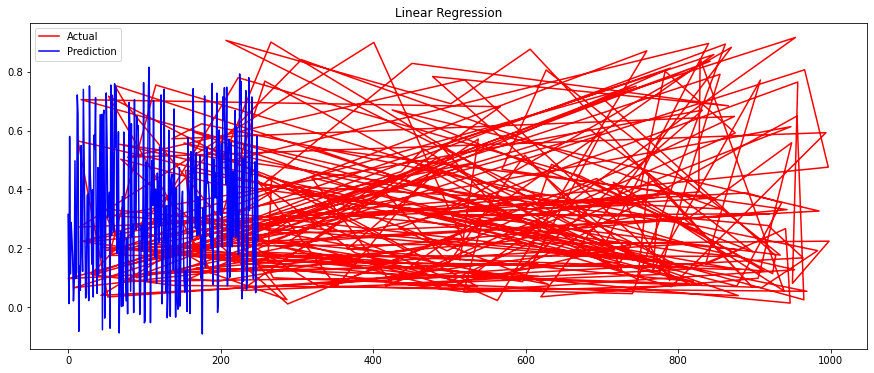

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction', color='blue')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Ridge Regression 

Mean absolute percentage error (MAPE): 0.27
Root mean squared error (RMSE): 0.07
Coefficient of determination (R2): 0.93
-0.0763053493543443
[ 7.27390299e-01  2.27578673e-02 -1.43471933e-03  5.90180768e-02
 -3.26750744e-02  2.32993273e-02  5.18902567e-02 -7.47940472e-05
 -1.45737117e-03  1.58867248e-02]


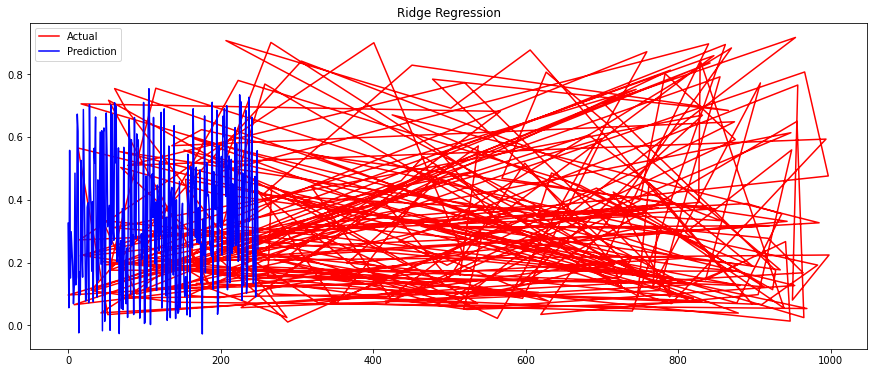

In [7]:
model = Ridge(alpha=10)
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction', color='blue')
plt.title('Ridge Regression')
plt.legend()
plt.show()

## Lasso Regression

Mean absolute percentage error (MAPE): 1.70
Root mean squared error (RMSE): 0.25
Coefficient of determination (R2): -0.02
0.36554491177805265
[ 0.  0. -0.  0. -0.  0.  0. -0.  0.  0.]


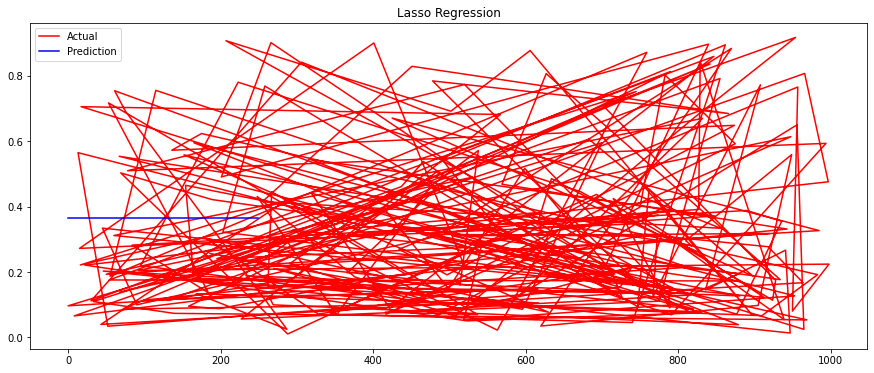

In [8]:
model = Lasso(alpha=5)
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction', color='blue')
plt.title('Lasso Regression')
plt.legend()
plt.show()

## Elastic Net Regression

Mean absolute percentage error (MAPE): 1.34
Root mean squared error (RMSE): 0.20
Coefficient of determination (R2): 0.33
Weights of the model:
	0.17205
	0.00000
	-0.00000
	0.00000
	-0.00000
	0.00000
	0.00000
	-0.00000
	0.00000
	0.00000
Intercept of the model: 0.27741



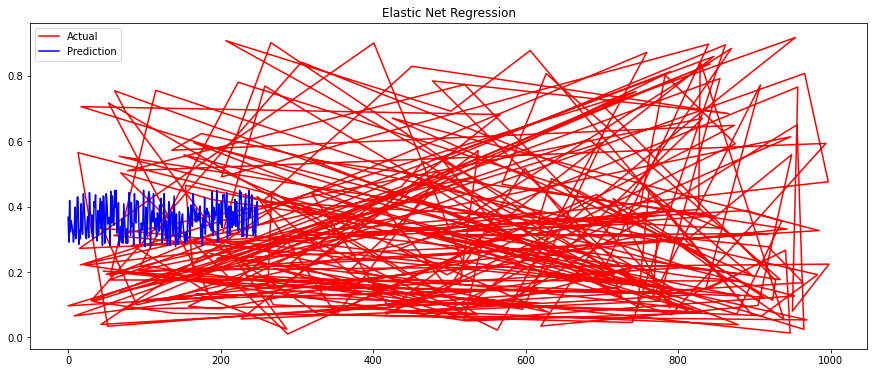

In [9]:
model =  ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))
print('Weights of the model:')
#print(model.coef_)
for i in model.coef_:
    print('\t%.5f' % i)
print('Intercept of the model: %.5f' % model.intercept_)
print()

plt.figure(figsize=(15, 6))
plt.plot(y_valid, label ='Actual',color='red')
plt.plot(y_valid_pred, label ='Prediction', color= 'blue')
plt.title('Elastic Net Regression')
plt.legend()
plt.show()

## Orthogonal Matching Pursuit

Mean absolute percentage error (MAPE): 0.38
Root mean squared error (RMSE): 0.06
Coefficient of determination (R2): 0.94
-0.11632824998231411
[ 0.84058744  0.          0.          0.07230351 -0.0402241   0.
  0.06850723  0.          0.          0.        ]


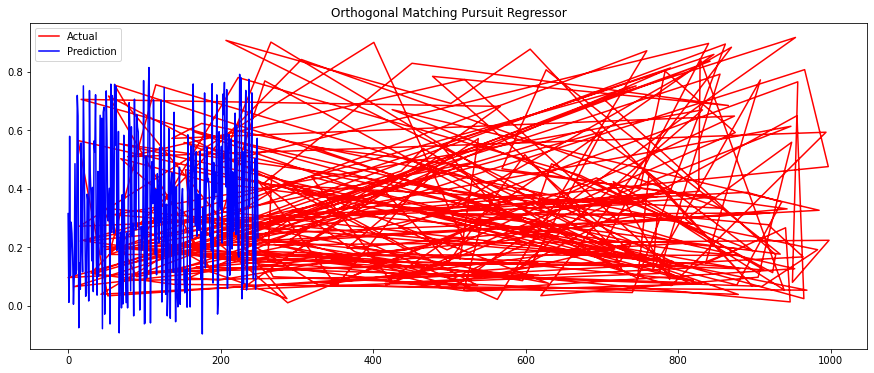

In [10]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=4)
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction',color='blue')
plt.title('Orthogonal Matching Pursuit Regressor')
plt.legend()
plt.show()

## Generalized Linear Model (GLM) / Tweedie Regressor

Mean absolute percentage error (MAPE): 1.65
Root mean squared error (RMSE): 0.24
Coefficient of determination (R2): 0.04
-1.051563221347129
[ 7.15057777e-02  5.23481648e-03 -9.18549078e-05  3.75502994e-03
 -2.06850830e-03  4.87447360e-03  2.33289038e-03 -1.20430698e-03
  9.53535368e-04  2.83431026e-03]


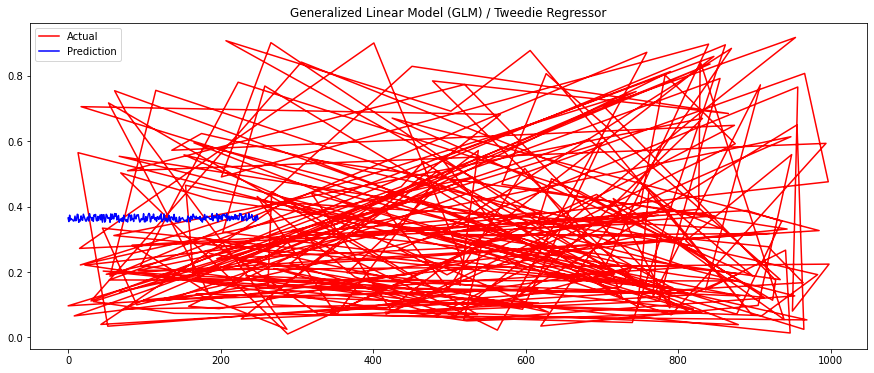

In [11]:
model = TweedieRegressor(power=1, alpha=1)
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction', color= 'blue')
plt.title('Generalized Linear Model (GLM) / Tweedie Regressor')
plt.legend()
plt.show()

## Stochastic Gradient Descent

Mean absolute percentage error (MAPE): 0.47
Root mean squared error (RMSE): 0.10
Coefficient of determination (R2): 0.84
[0.03463258]
[ 0.56912379  0.02589778 -0.00467741  0.03432198 -0.02675438  0.02281906
  0.02454861 -0.00616818  0.00162748  0.01349701]


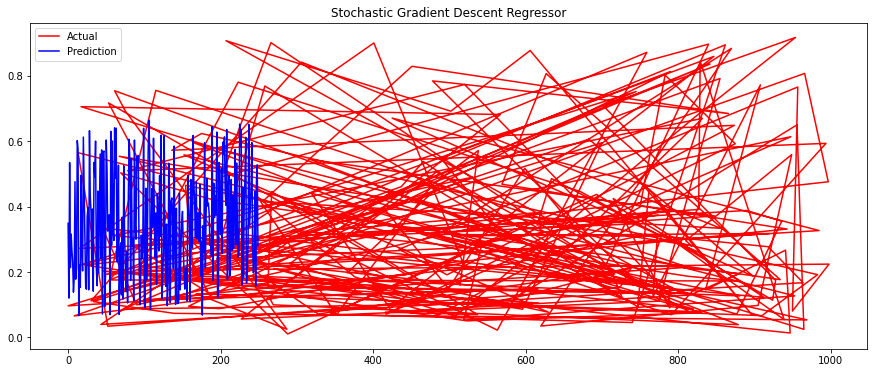

In [12]:
model = SGDRegressor()
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction', color='blue')
plt.title('Stochastic Gradient Descent Regressor')
plt.legend()
plt.show()

# Polynomial Regression 

## Pipeline

Mean absolute percentage error (MAPE): 0.05
Root mean squared error (RMSE): 0.01
Coefficient of determination (R2): 1.00


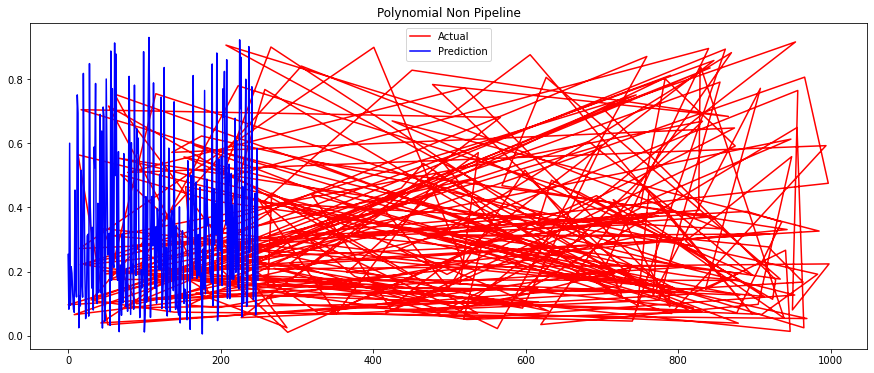

In [13]:
model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color= 'red')
plt.plot(y_valid_pred, label='Prediction', color='blue')
plt.title('Polynomial Non Pipeline')
plt.legend()
plt.show()

## Non Pipeline

       x1    x2    x3    x4    x5    x6    x7    x8    x9   x10
204  0.38  0.06  0.36  0.90  0.10  0.26  0.94  0.46  0.36  0.76
190  0.94  0.32  0.92  0.98  0.16  0.40  0.84  0.92  0.00  0.66
312  0.48  0.10  0.14  0.02  0.62  0.56  0.82  0.90  0.08  0.78
970  0.74  0.34  0.02  0.58  0.12  0.36  0.66  0.02  0.68  0.84
144  0.92  0.82  0.40  0.04  0.86  0.34  0.10  0.82  0.40  0.04
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
235  0.12  0.70  0.42  0.62  0.76  0.34  0.54  0.12  0.34  0.42
622  0.62  0.06  0.08  0.72  0.18  0.10  0.90  0.82  0.76  0.14
192  0.16  0.50  0.48  0.02  0.88  0.50  0.78  0.04  1.00  0.78
159  0.34  0.00  0.00  0.84  0.10  0.16  0.82  0.92  0.60  1.00
594  0.74  0.90  0.72  0.38  0.98  0.16  0.28  0.30  0.94  0.42

[750 rows x 10 columns]
       x1    x2    x3    x4    x5    x6    x7    x8    x9   x10  ...    x7^2  \
0    0.38  0.06  0.36  0.90  0.10  0.26  0.94  0.46  0.36  0.76  ...  0.8836   
1    0.94  0.32  0.92  0.98  0.16  0.40  0.84  

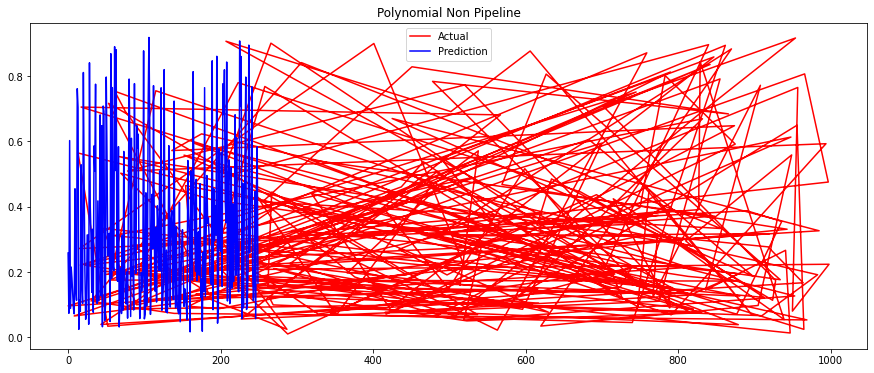

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(x_valid)

X_train_poly = pd.DataFrame(X_train_poly)
X_valid_poly = pd.DataFrame(X_valid_poly)

X_train_poly.columns = poly.get_feature_names(X_train.columns)
X_valid_poly.columns = poly.get_feature_names(X_train.columns)

print(X_train)
print(X_train_poly)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_valid_pred = model.predict(X_valid_poly)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual',color='red')
plt.plot(y_valid_pred, label='Prediction', color ='blue')
plt.title('Polynomial Non Pipeline')
plt.legend()
plt.show()

## Support Vector Machines (SVM) for Regression

Mean absolute percentage error (MAPE): 0.40
Root mean squared error (RMSE): 0.05
Coefficient of determination (R2): 0.95


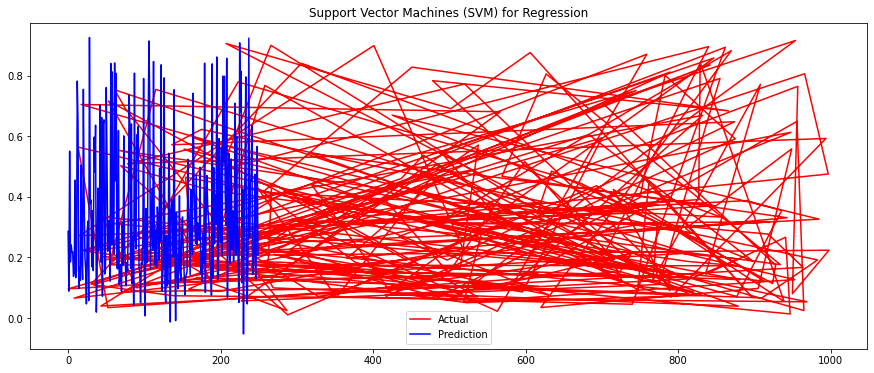

In [15]:
model = SVR(kernel='poly')
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction', color='blue')
plt.title('Support Vector Machines (SVM) for Regression')
plt.legend()
plt.show()

## Nearest Neighbors

Mean absolute percentage error (MAPE): 0.45
Root mean squared error (RMSE): 0.11
Coefficient of determination (R2): 0.82


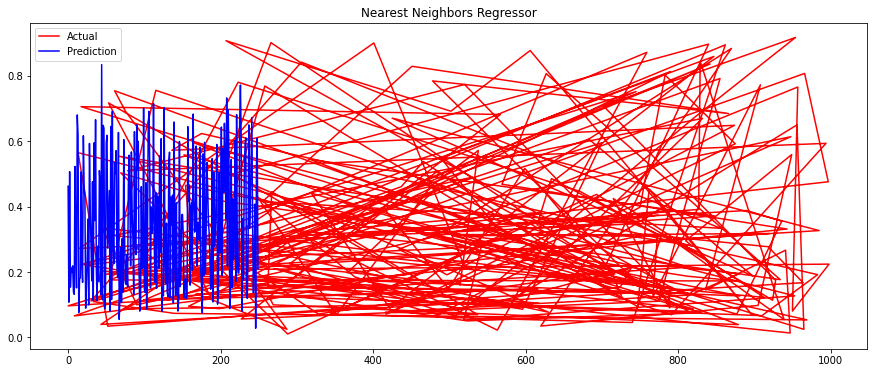

In [16]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction',color='blue')
plt.title('Nearest Neighbors Regressor')
plt.legend()
plt.show()

## Decision Tree Regression

Mean absolute percentage error (MAPE): 0.17
Root mean squared error (RMSE): 0.03
Coefficient of determination (R2): 0.99


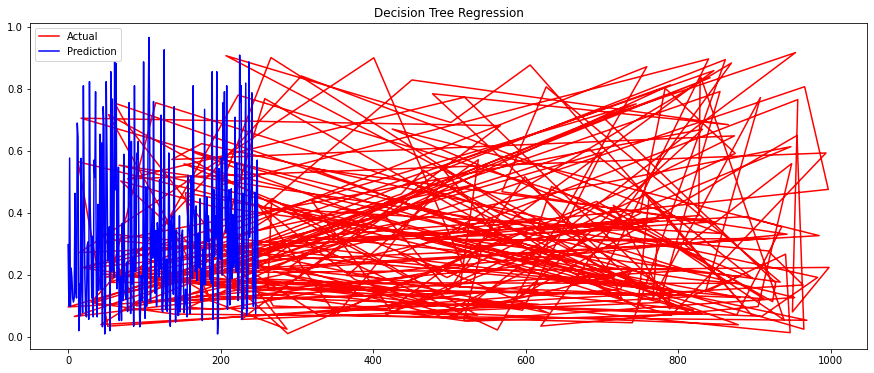

In [17]:
model = DecisionTreeRegressor(max_depth=9)
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual',color='red')
plt.plot(y_valid_pred, label='Prediction', color= 'blue')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

## Multi-layer Perceptron

Mean absolute percentage error (MAPE): 0.27
Root mean squared error (RMSE): 0.07
Coefficient of determination (R2): 0.93


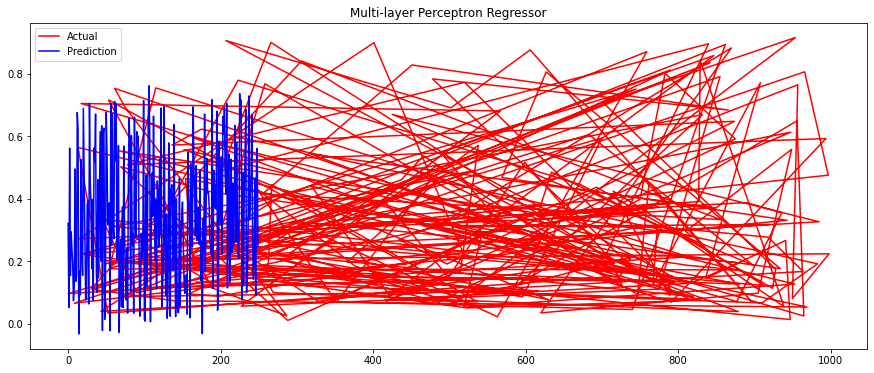

In [18]:
model = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', solver='adam', max_iter=10000)
model.fit(X_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual', color='red')
plt.plot(y_valid_pred, label='Prediction', color='blue')
plt.title('Multi-layer Perceptron Regressor')
plt.legend()
plt.show()

## +++++++++++++++++Terimakasih++++++++++++++++++++